# Heart Disease Prediction

In this machine learning project , I have collected the dataset from kaggle() and I will be using Machine Learning to predict whether any person is suffering from heart disease.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Here we will be experimenting with 3 algorithms


1. KNeighborsClassifier
2. Decision Tree Classifier
3. Random Forest Classifier

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
df=pd.read_csv('heartdisease.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Lets check for the missing values

In [25]:
df.isnull().values.any()

False

From the above observation we can say that there are no missing values

# Feature Selection

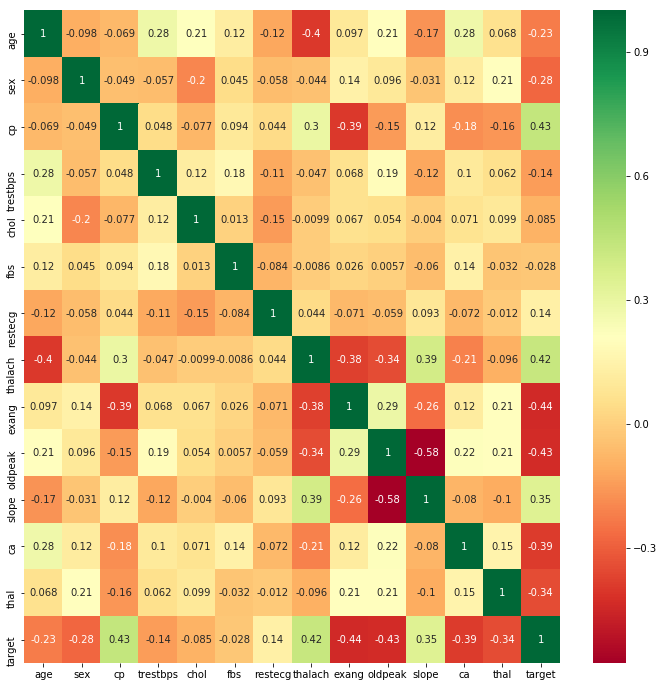

In [8]:
import seaborn as sns
plt.figure(figsize =(12,12))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D226BD1D0>,
      dtype=object)

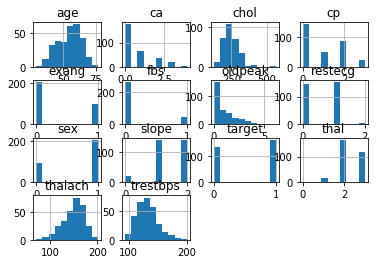

In [9]:
df.hist() 

Its always a good practice to work with a dataset where the target classes are balanced. Thus let's check for the same.

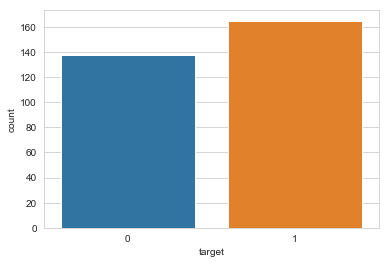

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='target', data=df)

# Data Processing

After exploring the dataset I observed that i need to convert some categorical variables into dummy variables and scale all the values before training the ML models. First I'll use the get_dummies method to create dummy columns for categorical variables.

In [11]:
df=pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
columns_to_scale=['age', 'trestbps', 'chol', 'thalach','oldpeak']
df[columns_to_scale] = standardscaler.fit_transform(df[columns_to_scale])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [14]:
y=df['target']
x=df.drop(['target'],axis=1)

In [15]:
x.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Using KNearestNeighbors Classifier

In [17]:
from sklearn.model_selection import cross_val_score
accuracy_rate=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, "['Accuracy Rate']")

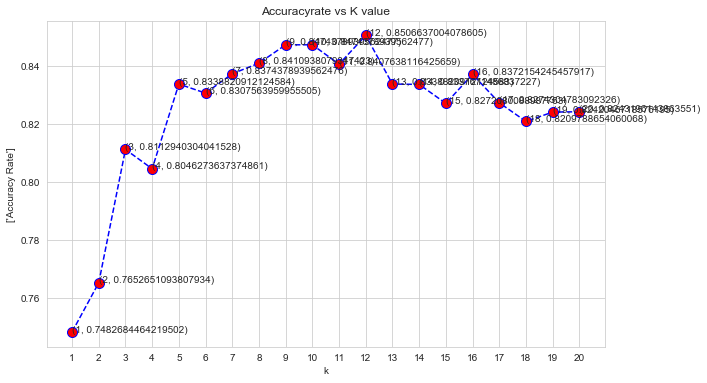

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),accuracy_rate,color='blue',Linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
for i in range(1,21):
    plt.text(i,accuracy_rate[i-1],(i,accuracy_rate[i-1]))
plt.title('Accuracyrate vs K value')
plt.xticks([i for i in range(1,21)])
plt.xlabel('k')
plt.ylabel(['Accuracy Rate'])

In [19]:
knn=KNeighborsClassifier(n_neighbors=12)
score=cross_val_score(knn,x,y,cv=10)
#accuracy_rate.append(score.mean())

In [20]:
score.mean()

0.8506637004078605

# Using RandomForest Classifier

In [21]:
randomforest_classifier=RandomForestClassifier()
score=cross_val_score(randomforest_classifier,x,y,cv=10)

In [22]:
score.mean()

0.8175528364849833

# Using DecisionTree Classifier

In [23]:
dt_classifier=DecisionTreeClassifier(criterion='gini',random_state=0)
score=cross_val_score(dt_classifier,x,y,cv=10)

In [24]:
score.mean()

0.7683908045977011